In [100]:
!pip install pandas

### 데이터 수집

In [101]:
import pandas as pd
csv = "C:/flyai/subway/subway.csv"
df = pd.read_csv(csv)
df.head(5)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202311,1호선,동대문,735,13924,16152,27027,40894,42404,41359,...,45380,37287,28739,26313,22382,14007,3127,255,0,0
1,202311,1호선,동묘앞,178,4052,8008,16740,34456,28740,32438,...,30361,17645,11638,11050,10001,5159,1724,404,0,0
2,202311,1호선,서울역,778,17943,70786,160541,318073,244174,151770,...,339141,195112,137623,131939,85706,41862,5297,263,0,0
3,202311,1호선,시청,86,7266,29532,82754,215527,119380,68972,...,202623,82467,70718,63988,40544,15172,1381,29,1,0
4,202311,1호선,신설동,475,11557,18259,45365,90304,56884,40687,...,84707,44268,29782,27417,21698,13015,2445,6,0,0


### 데이터 전처리

In [102]:
# 각 역별로 모든 시간대의 승차인원과 하차인원을 합산
start_col = df.columns.get_loc('04시-05시')
end_col = df.columns.get_loc('03시-04시') + 1
df['총 이용건수'] = df.iloc[:, start_col:end_col].sum(axis=1)
df.drop(df.columns[start_col:end_col], axis=1, inplace=True)

# '지하철역' 열 삭제
df.drop('지하철역', axis=1, inplace=True)

# '사용월'과 '호선명' 별로 '총 이용건수'를 합산합니다.
result = df.groupby(['사용월', '호선명']).sum()
result

총 이용건수
사용월    호선명            
202301 1호선    12610096
       2호선    74005347
       3호선    27627864
       4호선    26091006
       5호선    33847703
...                ...
202311 안산선     7280052
       우이신설선   2803153
       일산선     6400328
       장항선     1131428
       중앙선     5593841

[291 rows x 1 columns]

### 데이터 시각화

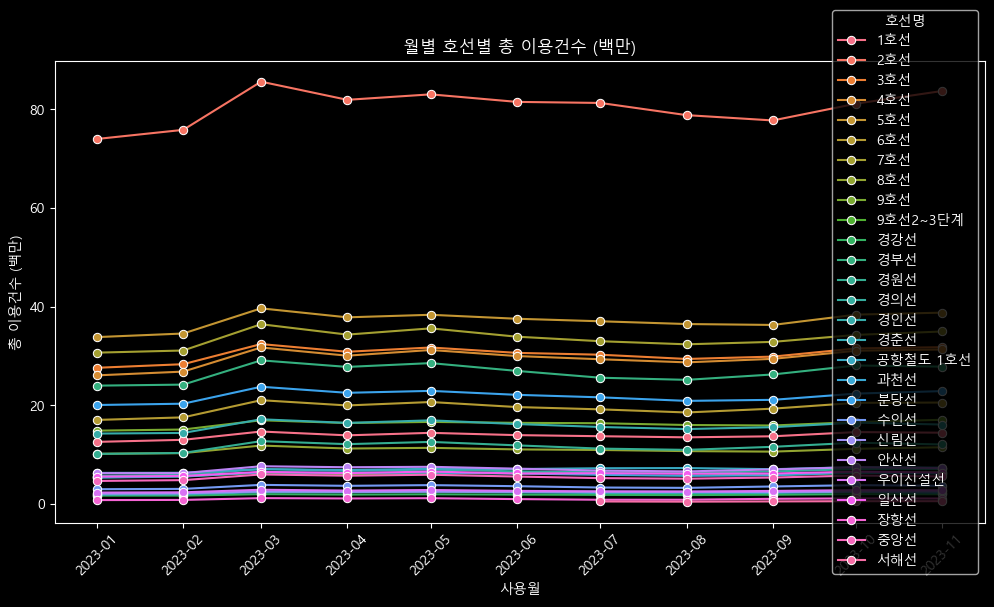

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc
%matplotlib inline
import matplotlib.font_manager as fm

# 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('dark_background')

# 인덱스(사용월)을 열로 설정
result = result.reset_index()
# '사용월' 필드를 날짜 형식으로 변환
result['사용월'] = pd.to_datetime(result['사용월'], format='%Y%m')  # 날짜 형식 지정

# '총 이용건수'를 백만 단위로 조정
result['총 이용건수'] = result['총 이용건수'] / 1e6

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='사용월', y='총 이용건수', hue='호선명', marker='o')
plt.title('월별 호선별 총 이용건수 (백만)')
plt.xlabel('사용월')
plt.ylabel('총 이용건수 (백만)')
plt.xticks(rotation=45)
plt.legend(title='호선명', loc='right')
# 그래프를 이미지 파일로 저장
plt.savefig('월별 호선별 총 이용건수.png', dpi=300) # 파일 이름과 해상도 설정
plt.show()

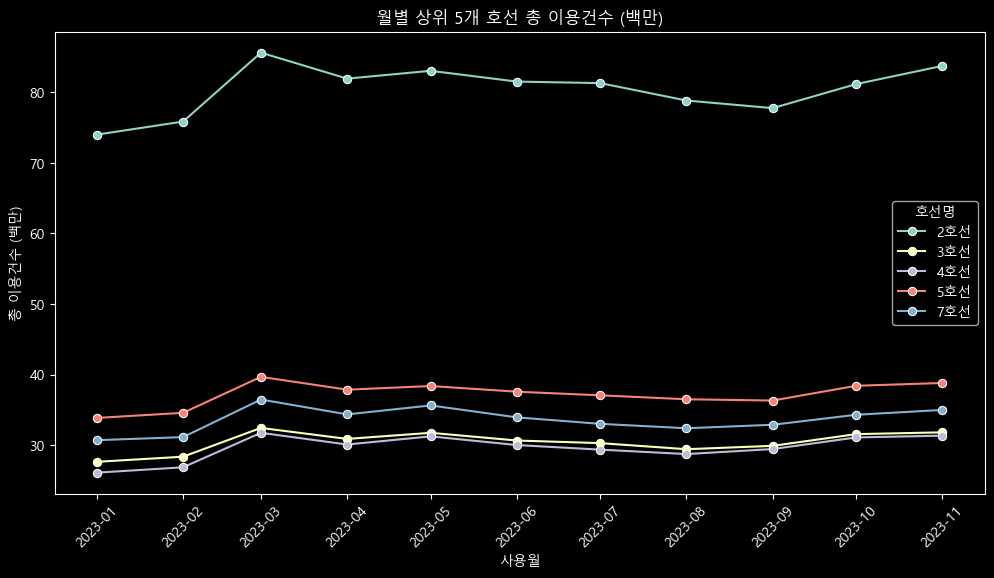

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc
%matplotlib inline
import matplotlib.font_manager as fm

# 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('dark_background')

# 인덱스(사용월)을 열로 설정
result = result.reset_index()
# '사용월' 필드를 날짜 형식으로 변환
result['사용월'] = pd.to_datetime(result['사용월'], format='%Y%m')  # 날짜 형식 지정

# '총 이용건수'를 백만 단위로 조정
result['총 이용건수'] = result['총 이용건수'] / 1e6

# 호선별 평균 이용건수를 계산하고 상위 5개 호선을 추출합니다.
top_5_lines = result.groupby('호선명')['총 이용건수'].mean().nlargest(5).index

# 상위 5개 호선에 해당하는 데이터만 필터링합니다.
top_5_data = result[result['호선명'].isin(top_5_lines)]

# 시각화를 위한 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(data=top_5_data, x='사용월', y='총 이용건수', hue='호선명', marker='o')
plt.title('월별 상위 5개 호선 총 이용건수 (백만)')
plt.xlabel('사용월')
plt.ylabel('총 이용건수 (백만)')
plt.xticks(rotation=45)
plt.legend(title='호선명', loc='best')
# 그래프를 이미지 파일로 저장
plt.savefig('월별 상위 5개 호선 총 이용건.png', dpi=300) # 파일 이름과 해상도 설정
plt.show()


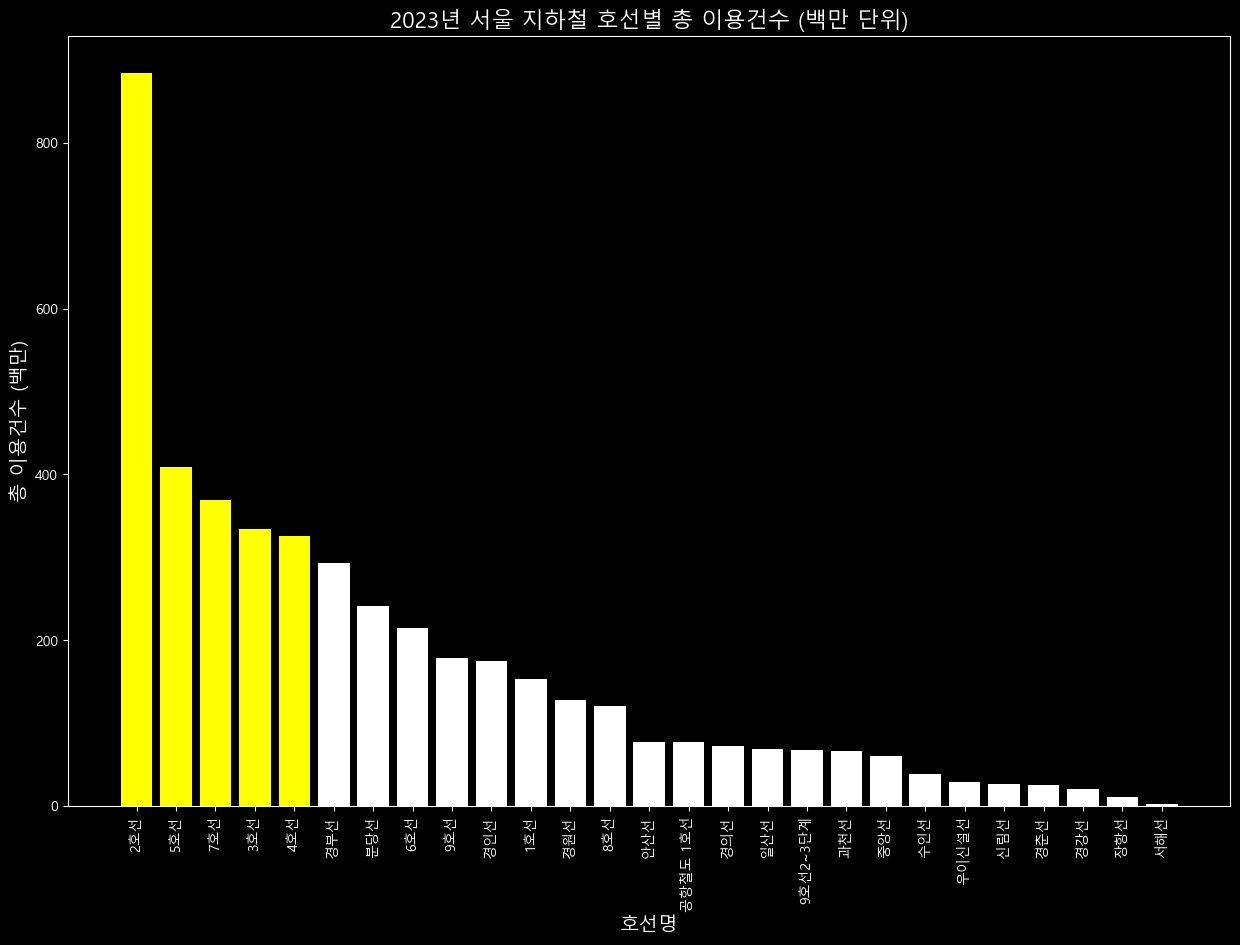

In [115]:
import pandas as pd
csv = "C:/flyai/subway/subway.csv"
df = pd.read_csv(csv)
# 각 역별로 모든 시간대의 승차인원과 하차인원을 합산
start_col = df.columns.get_loc('04시-05시')
end_col = df.columns.get_loc('03시-04시') + 1
df['총 이용건수'] = df.iloc[:, start_col:end_col].sum(axis=1)
df.drop(df.columns[start_col:end_col], axis=1, inplace=True)


# '사용월'과 '지하철역' 열을 삭제합니다.
df.drop(['사용월','지하철역'], axis=1, inplace=True)
# '호선명'으로 그룹화하고 '총 이용건수'의 합을 계산합니다.
df = df.groupby('호선명')['총 이용건수'].sum().reset_index()
df = df.sort_values(by='총 이용건수', ascending=False)

import pandas as pd
import matplotlib.pyplot as plt

# '총 이용건수'를 백만 단위로 조정
df['총 이용건수'] = df['총 이용건수'] / 1e6
# 상위 5개와 그 외를 다른 색상으로 표시
colors = ['yellow' if i < 5 else 'white' for i in range(df.shape[0])]

# 다시 막대 그래프 생성
plt.figure(figsize=(15, 10))
plt.bar(df["호선명"], df["총 이용건수"], color=colors)
plt.xlabel('호선명', fontsize=14)
plt.ylabel('총 이용건수 (백만)', fontsize=14)
plt.xticks(rotation=90)
plt.title('2023년 서울 지하철 호선별 총 이용건수 (백만 단위)', fontsize=16)
# 그래프를 이미지 파일로 저장
plt.savefig('2023년 서울 지하철 호선별 총 이용건.png', dpi=300) # 파일 이름과 해상도 설정
plt.show()